## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [1]:
import pandas as pd
import numpy as np
##### Import Other Required Library ###########
from pandas import DataFrame
from pandas import concat
import math
from sklearn.metrics import mean_squared_error
import statsmodels as sms
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reading the Stock 
raw_data=pd.read_csv("^NSEI.csv")

In [3]:
# Getting the head of the data
raw_data.head()

Date         Open         High          Low        Close  \
0  2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
1  2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2  2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
3  2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
4  2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

     Adj Close  Volume  
0  4494.649902     0.0  
1  4546.200195     0.0  
2  4732.350098     0.0  
3  4747.549805     0.0  
4  4837.549805     0.0

In [4]:
# Selecting Adj Close
df=raw_data[['Date','Adj Close']]

In [5]:
#Generating technicals Indicators
#Moving Averages
df['3MA']=df['Adj Close'].rolling(3).mean()
df['7MA']=df['Adj Close'].rolling(7).mean()
df['14MA']=df['Adj Close'].rolling(14).mean()

#Previous Day Returns
df['Prev_Returns']=raw_data['Close']-raw_data['Close'].shift(1)

#Relative Stock Returns
df['Rel_Returns']=((df['Adj Close']/df['Adj Close'].shift(1)))-1
df.head()

<ipython-input-5-e7866b150801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3MA']=df['Adj Close'].rolling(3).mean()
<ipython-input-5-e7866b150801>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7MA']=df['Adj Close'].rolling(7).mean()
<ipython-input-5-e7866b150801>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

Date    Adj Close          3MA  7MA  14MA  Prev_Returns  Rel_Returns
0  2007-09-17  4494.649902          NaN  NaN   NaN           NaN          NaN
1  2007-09-18  4546.200195          NaN  NaN   NaN     51.550293     0.011469
2  2007-09-19  4732.350098  4591.066732  NaN   NaN    186.149903     0.040946
3  2007-09-20  4747.549805  4675.366699  NaN   NaN     15.199707     0.003212
4  2007-09-21  4837.549805  4772.483236  NaN   NaN     90.000000     0.018957

In [6]:
# Generate More technical Features
#Other features: High Low Perc (HL_PCT), Perc change returns (PCT_change), std of last 5 days returns (std_5)
df['HL_PCT'] = (raw_data['High'] - raw_data['Low']) / raw_data['Close'] * 100.0
df['PCT_change'] = (raw_data['Close'] - raw_data['Open']) / raw_data['Open'] * 100.0
df['std_5'] = df['PCT_change'].rolling(5).std()
df=df.set_index('Date') 
df.head()

Adj Close          3MA  7MA  14MA  Prev_Returns  Rel_Returns  \
Date                                                                         
2007-09-17  4494.649902          NaN  NaN   NaN           NaN          NaN   
2007-09-18  4546.200195          NaN  NaN   NaN     51.550293     0.011469   
2007-09-19  4732.350098  4591.066732  NaN   NaN    186.149903     0.040946   
2007-09-20  4747.549805  4675.366699  NaN   NaN     15.199707     0.003212   
2007-09-21  4837.549805  4772.483236  NaN   NaN     90.000000     0.018957   

              HL_PCT  PCT_change     std_5  
Date                                        
2007-09-17  1.472856   -0.526736       NaN  
2007-09-18  1.545247    1.159300       NaN  
2007-09-19  3.988505    4.001980       NaN  
2007-09-20  0.836225    0.268218       NaN  
2007-09-21  2.521938    1.779939  1.728127

In [7]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
        """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
data= series_to_supervised(df, 1, 1)
#print(data)
data.head()

var1(t-1)    var2(t-1)    var3(t-1)    var4(t-1)   var5(t-1)  \
Date                                                                         
2007-10-08  5185.850098  5201.766602  5090.949986  4919.000000  -22.799804   
2007-10-09  5085.100098  5159.866699  5111.607143  4961.175014 -100.750000   
2007-10-10  5327.250000  5199.400065  5158.278599  5016.964286  242.149902   
2007-10-11  5441.450195  5284.600098  5218.292899  5067.614293  114.200195   
2007-10-12  5524.850098  5431.183431  5283.421457  5123.135742   83.399903   

            var6(t-1)  var7(t-1)  var8(t-1)  var9(t-1)      var1(t)  \
Date                                                                  
2007-10-08  -0.004377   1.620753  -0.428171   1.258311  5085.100098   
2007-10-09  -0.019428   4.415838  -1.950348   1.758377  5327.250000   
2007-10-10   0.047619   6.527758   5.226514   2.867385  5441.450195   
2007-10-11   0.021437   2.325672   2.126447   2.783594  5524.850098   
2007-10-12   0.015327   1.963854   1.580286   2.726253  5428.250000   

                var2(t)      var3(t)      var4(t)     var5(t)   var6(t)  \
Date                                                                      
2007-10-08  5159.866699  5111.607143  4961.175014 -100.750000 -0.019428   
2007-10-09  5199.400065  5158.278599  5016.964286  242.149902  0.047619   
2007-10-10  5284.600098  5218.292899  5067.614293  114.200195  0.021437   
2007-10-11  5431.183431  5283.421457  5123.135742   83.399903  0.015327   
2007-10-12  5464.850098  5314.485770  5165.328613  -96.600098 -0.017485   

             var7(t)   var8(t)   var9(t)  
Date                                      
2007-10-08  4.415838 -1.950348  1.758377  
2007-10-09  6.527758  5.226514  2.867385  
2007-10-10  2.325672  2.126447  2.783594  
2007-10-11  1.963854  1.580286  2.726253  
2007-10-12  2.702523 -1.756462  2.990042

In [8]:
#X.index

In [9]:
# Train Test Split  data (Make sure to consider the data is a time series data)
data=data.rename(columns={"var1(t-1)":"Adj Close", "var2(t-1)": "3MA", "var3(t-1)": "7MA","var4(t-1)":"14MA","var5(t-1)":"Prev_Returns","var6(t-1)":"Rel_Returns","var7(t-1)":"HL_PCT","var8(t-1)":"PCT_change","var9(t-1)":"std_5"})

X=data[['3MA','7MA','14MA','Prev_Returns','Rel_Returns','HL_PCT','PCT_change','std_5']]
y=data[['Adj Close']]

X_train, X_test = X.loc[X.index<= "2019-01-01"], X.loc[X.index > "2019-01-01"]
y_train, y_test = y.loc[y.index<= "2019-01-01"], y.loc[y.index > "2019-01-01"]
#y_train.tail()
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [10]:
# Train different Algorithms
# Linear Regression  
#X_train=sm.add_constant(X_train) 
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Realiza forward-backward selection de variables 
    basado en los p-value de statsmodels.api.OLS
    Argumentos:
        X - pandas.DataFrame con variables candidatas
        y - list-like con la variable dependiente
        initial_list - lista de vairables con las que empezar ( nombres de columnas de X)
                        por defecto empieza vacía
        threshold_in - incluye una variable si su p-value < threshold_in
        threshold_out -excluye una variable si su p-value > threshold_out
        verbose - para imprimir o no la inclusión y exclusión de variables
    Returns: lista de variables elegidas 
    SIEMPRE fijar threshold_in < threshold_out para evitar bucle infinito
    """
    included = list(initial_list)
    X = sm.add_constant(X)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add {:30} with a p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # all coef but the constant
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if p-values result empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Remove {:29} with a p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

stepwise_variables = stepwise_selection(X_train, y_train)
stepwise_results = sm.OLS(y_train,X_train[stepwise_variables]).fit()
stepwise_results.summary()

Add 14MA                           with a p-value 0.0
Add 7MA                            with a p-value 0.0
Add 3MA                            with a p-value 0.0
Add PCT_change                     with a p-value 0.0
Add Prev_Returns                   with a p-value 0.0
Remove PCT_change                    with a p-value 0.543697
Add HL_PCT                         with a p-value 0.00148116
Add std_5                          with a p-value 8.34558e-05


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.076e+07
Date:                Wed, 16 Sep 2020   Prob (F-statistic):                        0.00
Time:                        12:06:15   Log-Likelihood:                         -10899.
No. Observations:                2405   AIC:                                  2.181e+04
Df Residuals:                    2399   BIC:                                  2.184e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
14MA             0.0332      0.006      5.334      0.000       0.021       0.045
7MA             -0.2050      0.012    -17.594      0.000      -0.228      -0.182
3MA              1.1719      0.007    156.686      0.000       1.157       1.187
Prev_Returns     0.6509      0.006    103.330      0.000       0.639       0.663
HL_PCT          -2.6654      0.527     -5.056      0.000      -3.699      -1.632
std_5            3.2438      0.823      3.941      0.000       1.630       4.858
==============================================================================
Omnibus:                      120.815   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.104
Skew:                           0.055   Prob(JB):                     5.44e-95
Kurtosis:                       5.078   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y_pred=stepwise_results.predict(X_test[stepwise_variables])

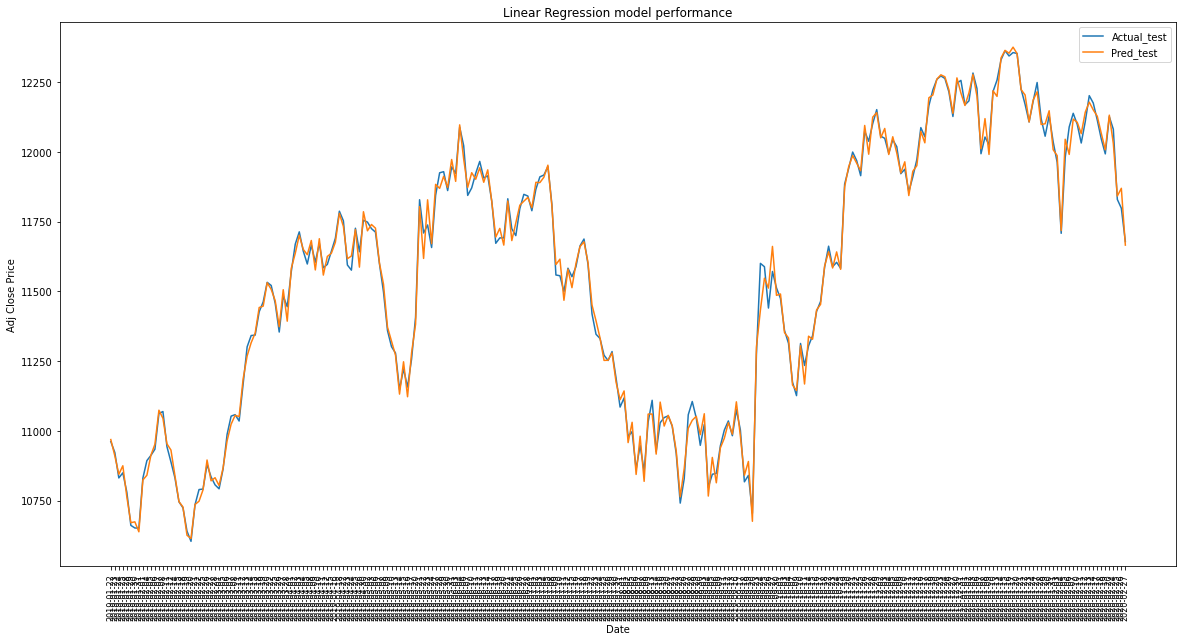

In [12]:
#Model Performance on test data
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test, label='Actual_test')
ax.plot(y_pred, label='Pred_test')
plt.xticks(pd.Series(X_test.index), rotation='vertical',fontsize=8)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Linear Regression model performance')
ax.legend()

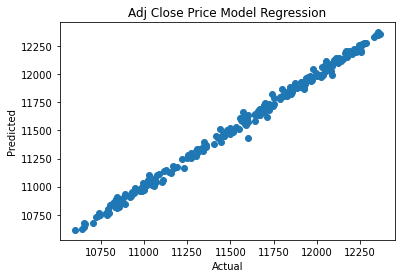

In [13]:
# Regression: Actual vs Predicted
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Adj Close Price Model Regression")
plt.show()

In [14]:
#Random Forest (rf)
y_train=np.ravel(y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.feature_importances_
rf_pred=rf.predict(X_test)

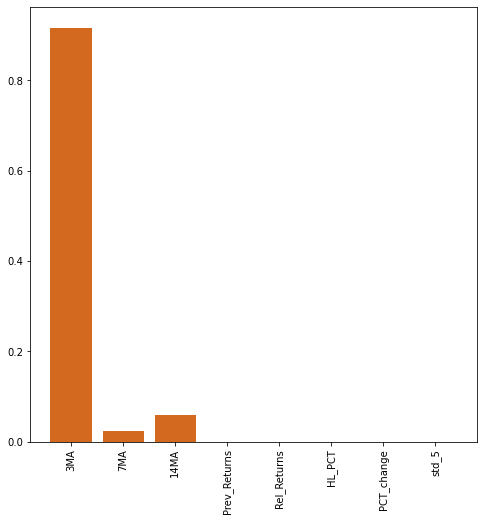

In [15]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(rf.feature_importances_))], rf.feature_importances_.tolist(), 
        tick_label=X_test.columns, color="chocolate")
plt.show()

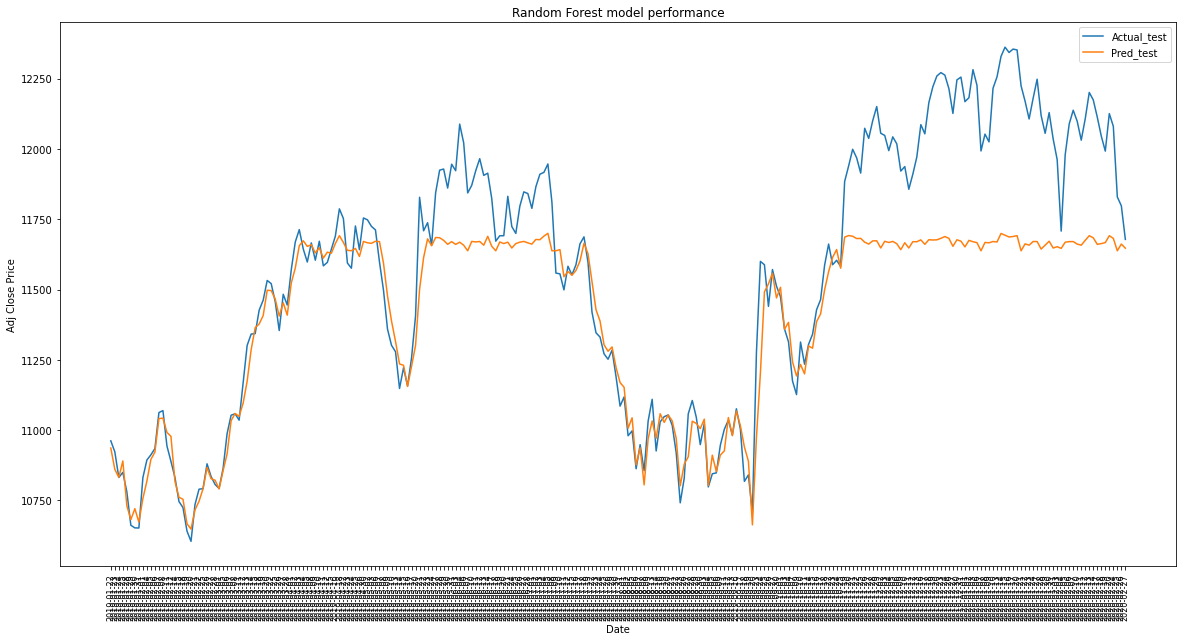

In [16]:
#Random Forest Model Performance on test data
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test, label='Actual_test')
ax.plot(rf_pred, label='Pred_test')
plt.xticks(pd.Series(X_test.index), rotation='vertical',fontsize=8)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Random Forest model performance')
ax.legend()

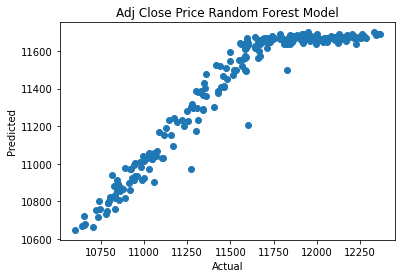

In [17]:
#Random Forest: Actual vs Predicted
plt.scatter(y_test,rf_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Adj Close Price Random Forest Model")
plt.show()

In [18]:
# Test performance of the model on the Testing Data using RMSE
print("RMSE_Reg = %0.2f" % math.sqrt(mean_squared_error(y_test, y_pred))) 
print("RMSE_rf = %0.2f" % math.sqrt(mean_squared_error(y_test, rf_pred))) 

RMSE_Reg = 30.65
RMSE_rf = 253.42
